<a href="https://colab.research.google.com/github/jferx/modelado-y-simulacion/blob/master/metodo_de_Heun_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

METODOS MULTIPASO

Para obtener aproximaciones de orden mayor, será necesario utilizar mas de una evaluación de la función $\mathrm(x, t)$ en cada paso. Cuando dichas evaluaciones se realizan de manera tal que para calcular $\mathrm(xk+1)$ sólo se utiliza el valor de
$xk$, se dice que el algoritmo es monopaso. Por el contrario, cuando se utilizan valores anteriores de la solución
$\mathrm(xk−1, xk−2, etc.)$, se dice que el algoritmo es multipaso.

METODO DE HEUN

inventado por el matematico alemán Karl Heun en el año 1900, es un
método que se utiliza para mejorar la estimación de la pendiente, emplea la determinación de dos derivadas en el intervalo (una en el punto inicial y otra en el final). Las dos derivadas se promedian después con la finalidad de obtener una mejor estimación de la pendiente en todo el intervalo.\
en el metodo de euler, la pendiente al inicio de un intervalo es:\
$\mathrm y^´_i=f(x_i,y_i)$

se utiliza para extrapolar linealmente a $y_{i+1}$  

 $\mathrm y^o_i=y_i+f(x_i,y_i)h$

 en el método de Heun la $y^0_{i+1}$ calculada no es la respuesta final, sino una predicción intermedia. Por consiguiente, la distinguimos con un superíndice $0$. esta ecuacion se llama ecuación predictora o simplemente predictor. Da una estimación de $y_{i+1}$ que
permite el cálculo de una estimación de la pendiente al final del intervalo:

$\mathrm y^´_{i+1}=f(x_{i+1},y^o_{i+1})$  \

asi se combinan las dos pendientes para obtener una pendiente promedio en el intervalo:

\begin{equation}
 y^´=\frac{y`_i+y`_{i+1}}{2}
\tag{}
\end{equation}
esta pendiente se utiliza para extrapolar linelamente desde $y_i$ hasta $y_{i+1}$

\begin{equation}
 y_{y+1}=y_i+\frac{f(x_i,y_i)+f(x_{i+1},y^o_{i+1})}{2}*h
\tag{}
\end{equation}

#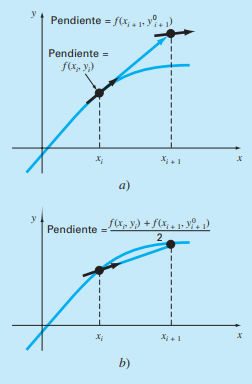
El beneficio que se obtiene es que el método de Heun realiza una aproximació de segundo orden y resulta mucho más preciso que
Euler.

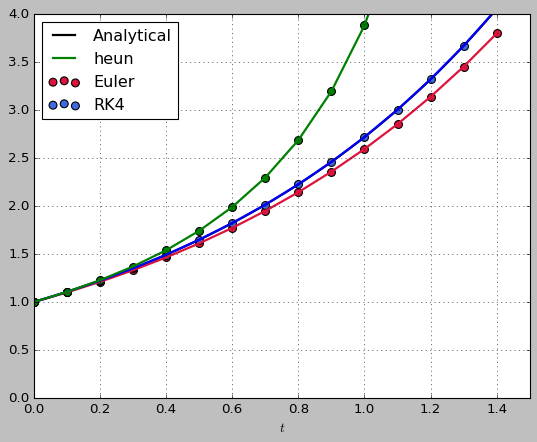

In [ ]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt
from math import exp,sin,cos

def euler( derivadas, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*derivadas(ti,xi,params)
      ti = ti + h
    return t, x


def rk4( derivadas, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = derivadas( ti,xi,params)
      k2 = derivadas( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = derivadas( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = derivadas( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

def heun(derivadas, h, tini, tfin, x0, params):
 	ti=tini
 	xi=x0
 	x=list()
 	t=list()
 	while(ti<tfin):
 		x.append(xi)
 		t.append(ti)
   
 		fx=derivadas(ti,xi,params)
   
 		xi = xi + 0.5*h*(fx+derivadas(ti+h,(xi+h)*fx,params))
 		ti = ti+h

 	return t,x

def sistema_1(t, x, a):
    x_dot = a*x
    return x_dot

a = 1
h = 0.1
tini = 0
tfin = 1.5
x0 = 1
r=5

t = np.linspace(0,10,1001)
x = x0*np.exp(a*t)

t1,x1 = euler( sistema_1, h, tini, tfin, x0, a )
t2,x2 = rk4( sistema_1, h, tini, tfin, x0, a )
t3,x3 = heun(sistema_1, h, tini, tfin, x0,a)

plt.figure()
# gráfica de analítica:
plt.plot(  t, x, 'black', label = 'Analytical', linewidth = 2)
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.plot(  t1, x1, 'crimson', linewidth = 2)

# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.plot(  t2, x2, 'blue', linewidth = 2)

#grafica de heun
plt.scatter(t3,x3,c='green',s=50)
plt.plot(  t3, x3, 'green', label = 'heun', linewidth = 2)

plt.xlim([0, tfin])
plt.ylim([-0, 4])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()